<a href="https://colab.research.google.com/github/JuanSpecht/ML2021/blob/main/PDI_TP_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Importo dependencias
import matplotlib.pyplot as plt
import numpy as np
import imageio as io

In [2]:
#@title Se carga la imagen

img_dir = 'CarinaNebula.jpg'
reader = io.get_reader(img_dir)
img = reader.get_data(0)

In [3]:
#@title Se extraen los atributos de la imagen

height, width, channels = img.shape

print ('La imagen está en formato ' + str(reader.format.plugin_id) +
       ', sus dimensiones son: ' + str(width) + ' px horizontales y ' +
       str(height) + ' px verticales. El archivo está compuesto de ' + 
       str(channels) + ' canales.')

La imagen está en formato JPEG, sus dimensiones son: 940 px horizontales y 625 px verticales. El archivo está compuesto de 3 canales.


### Ahora se separa la imagen en sus respectivos canales RGB y se grafican sobre un fondo blanco. Se ve que en las regiones donde la imagen original es más luminosa los tres canales tienen valores altos, y donde la imagen original es más oscura los tres canales tienen valores bajos.

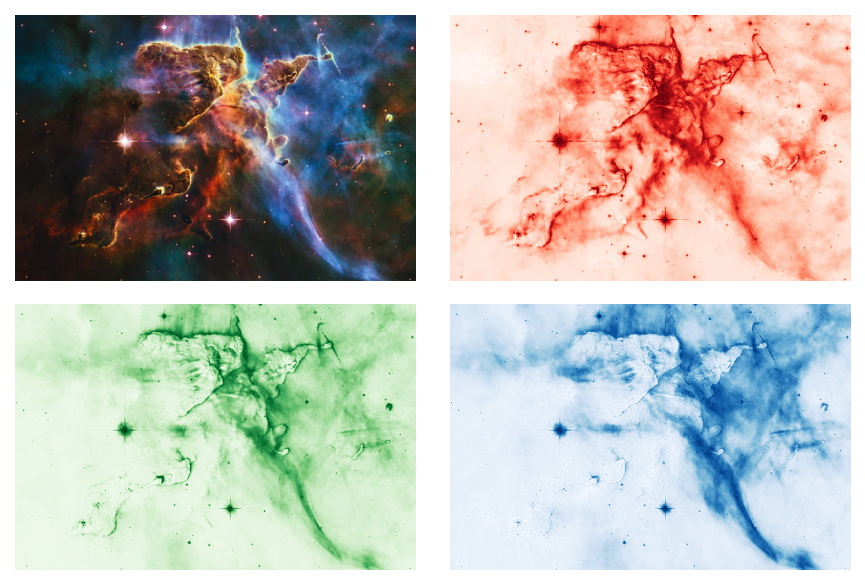

In [4]:
#@title Visualización de los tres canales por separado

red = img[:, :, 0]
green = img[:, :, 1]
blue = img[:, :, 2]

fig, axs = plt.subplots(2,2, dpi=150)

img_rgb = axs[0,0].imshow(img)
axs[0,0].axis('off')

img_red = axs[0,1].imshow(red, cmap='Reds')
axs[0,1].axis('off')

img_green = axs[1,0].imshow(green, cmap='Greens')
axs[1,0].axis('off')

img_blue = axs[1,1].imshow(blue, cmap='Blues')
axs[1,1].axis('off')

fig.tight_layout()
plt.show()

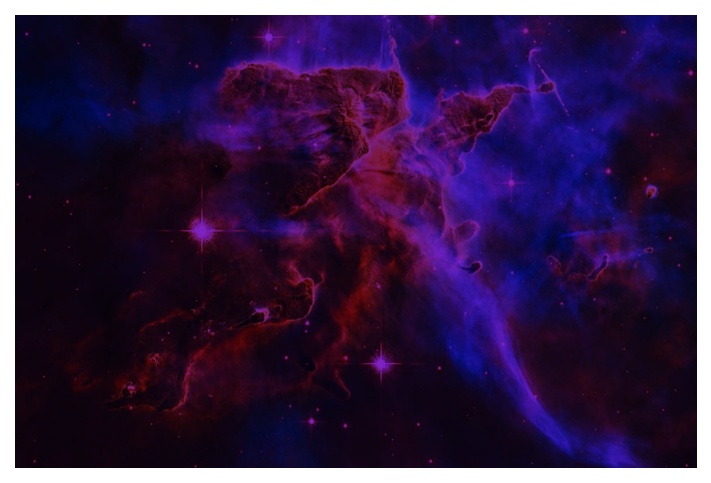

In [5]:
#@title Los sliders controlan los valores de los canales RGB { run: "auto" }

def rgb_controller(rgb_factors):

  img_new = np.multiply(img[:,:,0:3], rgb_factors) # transformo los canales
  rgb_controller.img_new = np.rint(img_new).astype(np.uint8) # redondeo a enteros
  
  fig = plt.figure(dpi=150)
  plt.imshow(rgb_controller.img_new)
  plt.axis('off');

red_factor = 0.5 #@param {type:"slider", min:0, max:1, step:0.01}
green_factor = 0.14 #@param {type:"slider", min:0, max:1, step:0.01}
blue_factor = 0.78 #@param {type:"slider", min:0, max:1, step:0.01}

rgb_controller([red_factor, green_factor, blue_factor])

In [6]:
#@title Se guarda la imagen resultante en un archivo
io.imwrite ('output_image' + ' [R: ' + str(red_factor*100) +
            '%, G: ' + str(green_factor*100) +
            '%, B: ' + str(blue_factor*100) +
            '%]' + reader.request.extension, rgb_controller.img_new)